In [73]:
import pyemu
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import shutil
import numpy as np
import sys
import matplotlib
import matplotlib.cm as cm

In [4]:
sys.path.insert(1, 'd:/spark-brc_gits/apexmf_git/')

In [5]:
from apexmf import apexmf_pst_viz
from apexmf.salt.salt_handler import SaltAnalysis
from apexmf.salt.analyzer import SaltAnalysis, SaltViz, get_stats

In [6]:
m_d = "d:/Projects/Watersheds/Animas/Analysis/AMRSs/calibration/main_ies_1_pp_rw_ies_init_zero"

pst = pyemu.Pst(os.path.join(m_d,'animas_amrs_pp_rw_ies_init_zero.pst'))

In [7]:
pr_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.0.obs.csv")
    )
pt_oe = pyemu.ObservationEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.obs.csv".format(10)))


In [8]:
pr_oe

return type uncaught, losing Ensemble type, returning DataFrame


,d009_cca_19961119,d009_cca_19970108,d009_cca_19970130,d009_cca_19970225,d009_cca_19970325,d009_cca_19970429,d009_cca_19970514,d009_cca_19970521,d009_cca_19970529,d009_cca_19970605,...,str_075_201103,str_075_201104,str_075_201105,str_075_201106,str_075_201107,str_075_201108,str_075_201109,str_075_201110,str_075_201111,str_075_201112
real_name,,,,,,,,,,,,,,,,,,,,,
0,90.7214,94.2017,95.6015,96.4617,94.9942,97.5085,1.012090,8.55550,1.73641,1.62085,...,7.609,19.66,81.73,138.8,27.57,25.98,27.70,28.01,5.404,7.182
1,88.4636,92.1408,93.4744,94.3700,93.4220,95.5853,1.045580,8.87215,1.72638,1.64368,...,7.707,19.76,81.99,138.6,27.55,26.12,27.84,28.08,5.487,7.215
2,137.3790,139.6100,140.3410,140.7830,138.4240,141.8340,1.276330,12.61790,2.02141,2.01355,...,7.720,19.71,82.16,138.9,27.64,26.12,27.83,28.12,5.454,7.278
3,91.1941,93.5505,94.7323,95.2829,90.9312,96.1568,1.012670,8.62347,1.71334,1.62134,...,7.730,19.71,82.05,139.6,27.55,26.08,27.76,28.03,5.452,7.160
4,134.6180,136.5410,137.1950,138.0360,137.6760,139.4760,1.402220,12.70290,2.01917,1.99649,...,7.988,19.71,81.56,139.2,27.68,26.15,27.81,28.11,5.493,7.208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,116.6640,118.8680,120.3370,121.0930,117.6360,122.4450,1.271380,10.73680,1.90659,1.79866,...,7.530,19.64,81.83,138.4,27.55,25.99,27.77,28.04,5.436,7.129
146,48.5509,50.3475,51.9477,51.7755,46.8336,51.6957,0.628567,4.98537,1.41906,1.29848,...,7.610,19.65,81.98,139.4,27.82,26.05,27.70,28.02,5.436,7.199
147,66.0221,67.8331,69.5401,69.3609,67.2656,69.4247,0.730216,6.21354,1.52544,1.42277,...,7.709,19.78,81.85,139.9,27.62,26.05,27.84,28.06,5.486,7.142


In [27]:
prior_df = pyemu.ParameterEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(0)))
post_df = pyemu.ParameterEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(9)))

In [28]:
prior_df

return type uncaught, losing Ensemble type, returning DataFrame


,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,soil_caso_l,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
real_name,,,,,,,,,,,,,,,,,,,,,
0,1.761020e-03,2.710140e-05,0.000019,26.553800,6.984800,0.000048,0.320354,6.625520,8.530000,0.279000,...,91.95320,35.963000,196.401000,399.517000,311.831000,0.003290,227.46200,6.815930,243.985000,631.77100
1,5.006660e-07,1.941990e-04,0.001722,0.020570,14.000000,16.600000,0.000876,15.100000,0.036540,0.033314,...,91.95320,66.384100,121.816000,10.962300,311.831000,487.254000,385.20300,0.034331,584.681000,24.01850
2,1.665460e-06,6.973840e-02,0.001562,0.659993,0.016588,16.600000,19.200000,11.407700,0.503859,0.000075,...,3.51203,221.918000,3.276990,399.517000,6.383740,0.681688,21.26920,2.266810,0.025665,631.77100
3,1.919640e-05,1.050670e-04,0.000011,1.883470,14.000000,0.018964,2.011350,0.027785,4.765190,0.279000,...,91.95320,87.481800,196.401000,306.760000,188.287000,487.254000,385.20300,407.473000,315.269000,631.77100
4,9.300100e-09,1.199250e-03,0.020159,28.300000,14.000000,16.600000,19.200000,15.100000,8.530000,0.000066,...,91.95320,21.056900,0.303593,5.437710,1.093130,487.254000,23.74050,284.042000,53.159700,631.77100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.766600e-04,4.720070e-07,0.008204,0.008367,0.473751,16.600000,0.010000,0.001805,8.530000,0.279000,...,91.95320,0.192118,196.401000,60.136000,0.000145,2.533870,385.20300,407.473000,584.681000,11.36290
146,1.321340e-06,5.640290e-06,0.222476,28.300000,14.000000,0.001900,19.200000,8.561640,8.530000,0.279000,...,91.95320,221.918000,32.262400,22.720600,99.689300,487.254000,385.20300,407.473000,584.681000,631.77100
147,3.763920e-10,3.846650e-05,0.500000,27.950700,0.000265,16.600000,19.200000,0.023328,8.530000,0.279000,...,91.95320,221.918000,196.401000,0.731263,0.113994,487.254000,174.18200,407.473000,584.681000,3.67866


# Get prior and posterior from each fold parameter sets

In [21]:
df_pars = pd.read_csv(os.path.join(m_d, "animas_amrs.par_data02_zero.csv"))
sel_pars = df_pars.loc[df_pars["partrans"]=='log']

In [22]:
sel_pars

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,...,pstyle,i,j,x,y,zone,usecol,idx0,idx1,idx2
0,aquf_caco3,log,factor,0.00001,1.100000e-10,0.500,aquf,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aquf_caso4,log,factor,0.00001,1.100000e-10,0.500,aquf,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aquf_mgso4,log,factor,0.00001,1.100000e-10,0.500,aquf,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,soil_caco_h,log,factor,23.70000,1.100000e-10,28.300,soil,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soil_caco_l,log,factor,12.60000,1.100000e-10,14.000,soil,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,salt_so4032,log,factor,286.62000,1.100000e-10,487.254,salt_so40,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331,salt_so4033,log,factor,226.59000,1.100000e-10,385.203,salt_so40,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,salt_so4034,log,factor,239.69000,1.100000e-10,407.473,salt_so40,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,salt_so4035,log,factor,343.93000,1.100000e-10,584.681,salt_so40,1.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


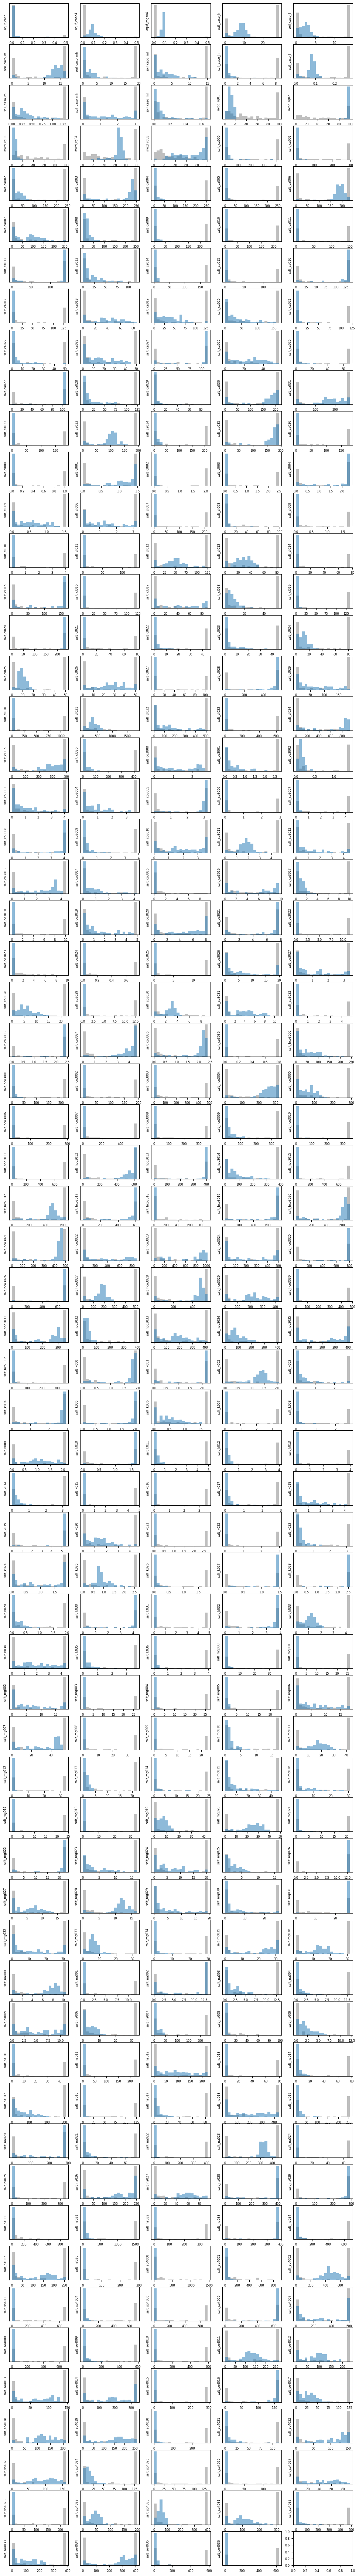

In [49]:
fig, axes = plt.subplots(figsize=(12, 90), nrows=63, ncols=5)
# ax1 = fig.add_subplot(111, frameon=False)
# ax1 = plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for i, ax in enumerate(axes.flat):
    if i<314:
        colnam = sel_pars['parnme'].tolist()[i]
        ax.hist(prior_df.loc[:, colnam].values,
                bins=np.linspace(
                    sel_pars.loc[sel_pars["parnme"]==colnam, 'parlbnd'].values[0], 
                    sel_pars.loc[sel_pars["parnme"]==colnam, 'parubnd'].values[0], 20),
                color = "gray", alpha=0.5, density=True,
                label="Prior"
        )
        y, x, _ = ax.hist(post_df.loc[:, colnam].values,
                bins=np.linspace(
                    sel_pars.loc[sel_pars["parnme"]==colnam, 'parlbnd'].values[0], 
                    sel_pars.loc[sel_pars["parnme"]==colnam, 'parubnd'].values[0], 20), 
                 alpha=0.5, density=True, label="Posterior"
        )
    #     ax.vlines(best_sceua_pars[i], 0, y.max(), label="SCE-UA", color='g')
    #     ax.vlines(best_dream_pars.iloc[0, i], 0, y.max(), label="DREAM", color='r')
    #     print(x[np.where(y == y.max())])
    #     ax.set_xlabel("Parameter range")
        ax.set_ylabel(colnam)
        ax.set_yticks([])

In [ ]:
def plot_prior_posterior_par_hist(ax, results, par_df, par_id, prior_num, posterior_num):
    """plot prior and posterior parameter histogram
       This functing is the last 100 runs

    Args:
        ax (ax): _description_
        results (dataframe): parameter result dataframe
        par_df (dataframe): parameter dataset
        par_id (index): index from length of parameter dataframe
    """
    
    ax.hist(
        results.loc[:prior_num, par_df.loc[par_id, 'name']].values,
        bins=np.linspace(par_df.loc[par_id, 'min'], par_df.loc[par_id, 'max'], 20),color = "gray", alpha=0.5, density=True
    )
#     ax.hist(
#         results.loc[-posterior_num:, par_df.loc[par_id, 'name']].values,
#         bins=np.linspace(par_df.loc[par_id, 'min'], par_df.loc[par_id, 'max'], 20), alpha=0.5, density=True
#     )
    ax.set_ylabel("Density")
    ax.set_xlim(par_df.loc[par_id, 'min'], par_df.loc[par_id, 'max'])

In [52]:
print(sel_pars.parnme)

0       aquf_caco3
1       aquf_caso4
2       aquf_mgso4
3      soil_caco_h
4      soil_caco_l
          ...     
330    salt_so4032
331    salt_so4033
332    salt_so4034
333    salt_so4035
334    salt_so4036
Name: parnme, Length: 314, dtype: object


In [55]:
len(colnams)

11

In [101]:
colnams = [
    "soil_caco_h", "salt_ca033", "salt_cl025", "salt_co3011", "salt_hco3027", "salt_k002",
    "salt_mg028", "salt_na023", "salt_so4030"]

In [102]:
phi_df = pd.read_csv(os.path.join(m_d, "animas_amrs_pp_rw_ies_init_zero.phi.actual.csv"))
phi_vals = phi_df.loc[:, "mean"].tolist()

In [103]:
minima = min(phi_vals)
maxima = max(phi_vals)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.rainbow)

rgba_vals = []
for v in phi_vals:
    print(mapper.to_rgba(v))
    rgba_vals.append(mapper.to_rgba(v))

(1.0, 1.2246467991473532e-16, 6.123233995736766e-17, 1.0)
(0.025490196078431393, 0.7348449670469757, 0.9160336012803335, 1.0)
(0.18627450980392157, 0.47309355683601007, 0.9697969360350095, 1.0)
(0.2803921568627451, 0.33815827481581706, 0.9851622334675065, 1.0)
(0.38235294117647056, 0.18374951781657034, 0.9957341762950345, 1.0)
(0.40588235294117647, 0.1473016980546375, 0.997269173385788, 1.0)
(0.44509803921568625, 0.08613293949614599, 0.9990704811844932, 1.0)
(0.4764705882352941, 0.03695149938914489, 0.9998292504580527, 1.0)
(0.49215686274509807, 0.012319659535238442, 0.9999810273487268, 1.0)
(0.5, 0.0, 1.0, 1.0)
(0.5, 0.0, 1.0, 1.0)


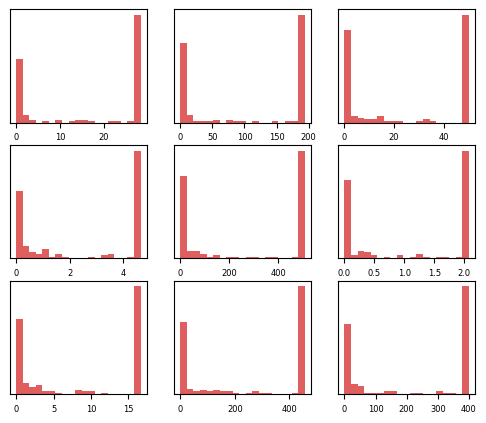

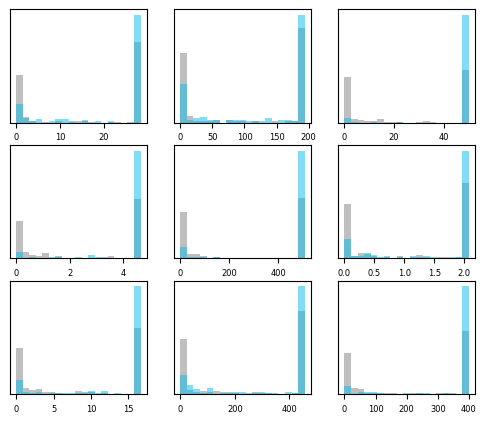

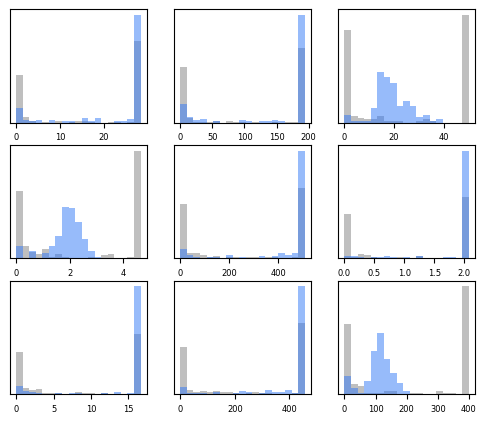

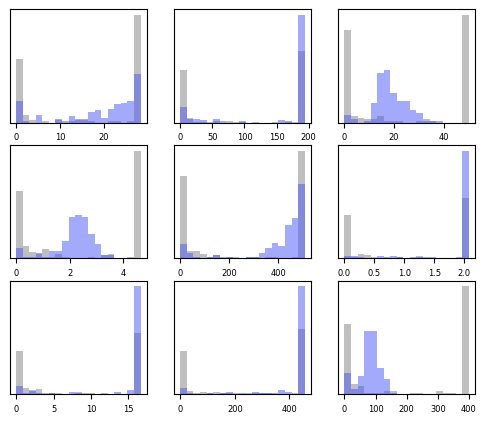

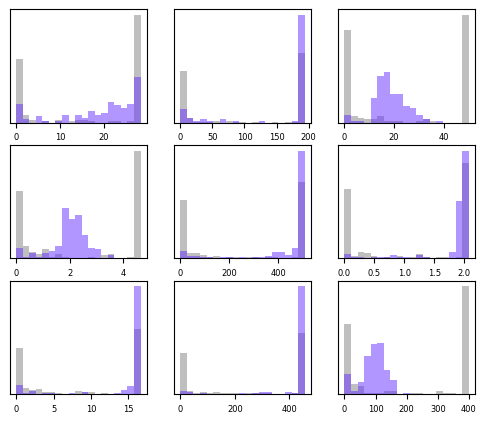

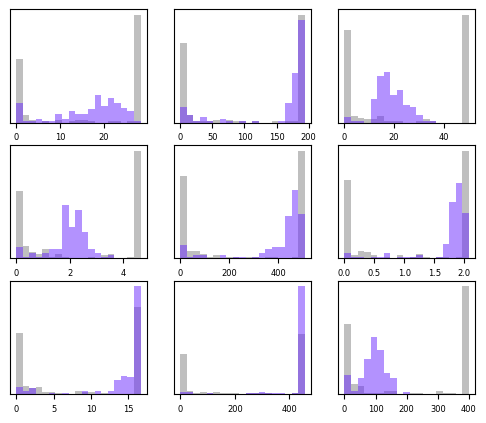

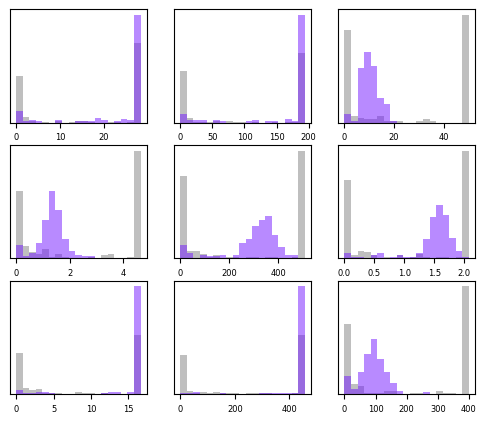

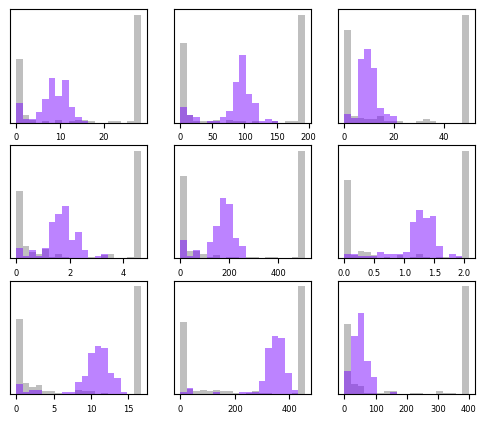

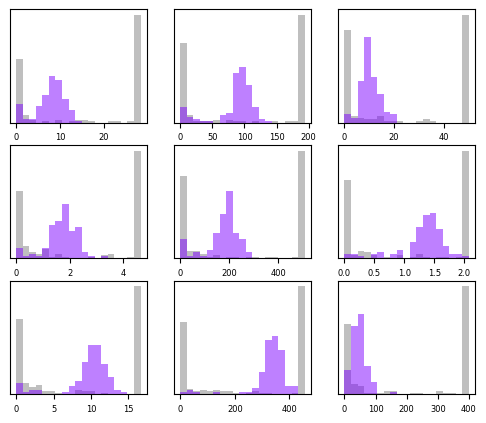

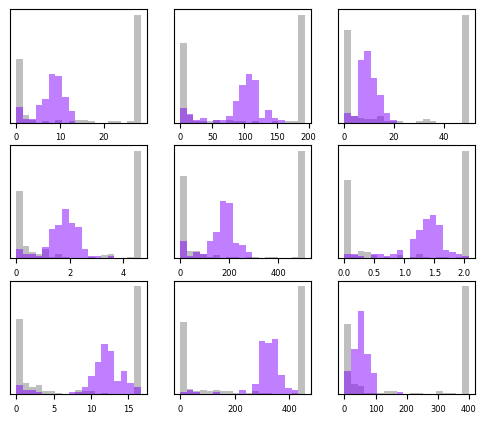

In [108]:
for fid in range(10):
    post_df = pyemu.ParameterEnsemble.from_csv(
        pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(fid)))
    fig, axes = plt.subplots(figsize=(6, 5), nrows=3, ncols=3)
    # ax1 = fig.add_subplot(111, frameon=False)
    # ax1 = plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

    for i, ax in enumerate(axes.flat):
        if i<9:
            colnam = colnams[i]
            ax.hist(prior_df.loc[:, colnam].values,
                    bins=np.linspace(
                        sel_pars.loc[sel_pars["parnme"]==colnam, 'parlbnd'].values[0], 
                        sel_pars.loc[sel_pars["parnme"]==colnam, 'parubnd'].values[0], 20),
                    color = "gray", alpha=0.5, density=True,
                    label="Prior"
            )
            y, x, _ = ax.hist(post_df.loc[:, colnam].values,
                    bins=np.linspace(
                        sel_pars.loc[sel_pars["parnme"]==colnam, 'parlbnd'].values[0], 
                        sel_pars.loc[sel_pars["parnme"]==colnam, 'parubnd'].values[0], 20), 
                     alpha=0.5, density=True, label="Posterior",
                    color=[rgba_vals[fid]]
            )
        #     ax.vlines(best_sceua_pars[i], 0, y.max(), label="SCE-UA", color='g')
        #     ax.vlines(best_dream_pars.iloc[0, i], 0, y.max(), label="DREAM", color='r')
        #     print(x[np.where(y == y.max())])
        #     ax.set_xlabel("Parameter range")
    #         ax.set_ylabel(colnam)
            ax.set_yticks([])
            plt.savefig(os.path.join(m_d, 'par_dis{}.png'.format(fid)), dpi=300)


In [91]:
colnams2 = [
    "aquf_caso4", "rivcd_rg04"]

In [95]:
post_df = pyemu.ParameterEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(9)))

In [96]:
post_df

return type uncaught, losing Ensemble type, returning DataFrame


,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,soil_caso_l,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
real_name,,,,,,,,,,,,,,,,,,,,,
0,0.004033,0.055984,0.075837,11.45240,3.593540,0.239215,0.198437,3.739260,0.327838,0.075017,...,64.386500,1.235560e-04,45.9388,52.0456,49.846100,0.006049,145.5370,407.473,6.009790,3.903790e-06
1,0.000165,0.056557,0.089234,10.25160,4.534450,14.286700,0.013697,1.559600,0.010279,0.071291,...,46.472500,2.648420e-04,87.4650,60.4872,66.871300,25.461400,207.7660,163.140,4.643510,5.767550e-07
2,0.000303,0.069721,0.093750,10.40020,0.303964,13.700300,1.739780,3.756440,0.020913,0.012006,...,85.771600,9.954510e-04,18.9930,89.6630,102.824000,0.731481,228.5960,324.857,0.070072,1.348730e-05
3,0.000460,0.087506,0.098063,11.49460,2.554720,15.470100,0.039281,0.266360,0.470384,0.093524,...,68.929500,3.601970e-03,34.4144,38.7536,234.443000,206.738000,171.9180,370.281,15.581400,1.355630e-05
5,0.032489,0.108905,0.093898,9.46309,2.423480,13.289300,7.888300,0.233120,0.840703,0.081932,...,69.700900,2.231490e-07,54.6255,45.5605,61.643400,10.352200,275.1290,313.463,0.106032,8.191220e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.001155,0.005888,0.092644,8.60674,2.329020,13.649600,0.611982,3.981870,0.005042,0.083646,...,81.032000,1.734270e-05,32.1384,52.0150,113.230000,2.116870,104.6190,312.586,11.461400,7.644760e-06
143,0.000285,0.055313,0.082040,13.32730,2.979870,15.696900,8.304570,1.348030,0.322852,0.102245,...,0.013696,6.617330e-06,51.0638,33.4166,100.444000,45.177100,91.4529,69.718,0.040606,7.347480e-09
145,0.021722,0.104615,0.083164,3.22662,1.209430,15.391300,0.009932,0.060053,0.206266,0.069119,...,48.303500,2.465390e-06,33.5687,42.1434,0.087819,0.365904,162.1420,317.119,14.519700,1.938390e-06


In [137]:
post_df

return type uncaught, losing Ensemble type, returning DataFrame


,aquf_caco3,aquf_caso4,aquf_mgso4,soil_caco_h,soil_caco_l,soil_caco_m,soil_caco_mh,soil_caco_ml,soil_caso_h,soil_caso_l,...,salt_so4027,salt_so4028,salt_so4029,salt_so4030,salt_so4031,salt_so4032,salt_so4033,salt_so4034,salt_so4035,salt_so4036
real_name,,,,,,,,,,,,,,,,,,,,,
0,0.004033,0.055984,0.075837,11.45240,3.593540,0.239215,0.198437,3.739260,0.327838,0.075017,...,64.386500,1.235560e-04,45.9388,52.0456,49.846100,0.006049,145.5370,407.473,6.009790,3.903790e-06
1,0.000165,0.056557,0.089234,10.25160,4.534450,14.286700,0.013697,1.559600,0.010279,0.071291,...,46.472500,2.648420e-04,87.4650,60.4872,66.871300,25.461400,207.7660,163.140,4.643510,5.767550e-07
2,0.000303,0.069721,0.093750,10.40020,0.303964,13.700300,1.739780,3.756440,0.020913,0.012006,...,85.771600,9.954510e-04,18.9930,89.6630,102.824000,0.731481,228.5960,324.857,0.070072,1.348730e-05
3,0.000460,0.087506,0.098063,11.49460,2.554720,15.470100,0.039281,0.266360,0.470384,0.093524,...,68.929500,3.601970e-03,34.4144,38.7536,234.443000,206.738000,171.9180,370.281,15.581400,1.355630e-05
5,0.032489,0.108905,0.093898,9.46309,2.423480,13.289300,7.888300,0.233120,0.840703,0.081932,...,69.700900,2.231490e-07,54.6255,45.5605,61.643400,10.352200,275.1290,313.463,0.106032,8.191220e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.001155,0.005888,0.092644,8.60674,2.329020,13.649600,0.611982,3.981870,0.005042,0.083646,...,81.032000,1.734270e-05,32.1384,52.0150,113.230000,2.116870,104.6190,312.586,11.461400,7.644760e-06
143,0.000285,0.055313,0.082040,13.32730,2.979870,15.696900,8.304570,1.348030,0.322852,0.102245,...,0.013696,6.617330e-06,51.0638,33.4166,100.444000,45.177100,91.4529,69.718,0.040606,7.347480e-09
145,0.021722,0.104615,0.083164,3.22662,1.209430,15.391300,0.009932,0.060053,0.206266,0.069119,...,48.303500,2.465390e-06,33.5687,42.1434,0.087819,0.365904,162.1420,317.119,14.519700,1.938390e-06


In [142]:
x_var = "salt_ca033"
y_var = "rivcd_rg04"

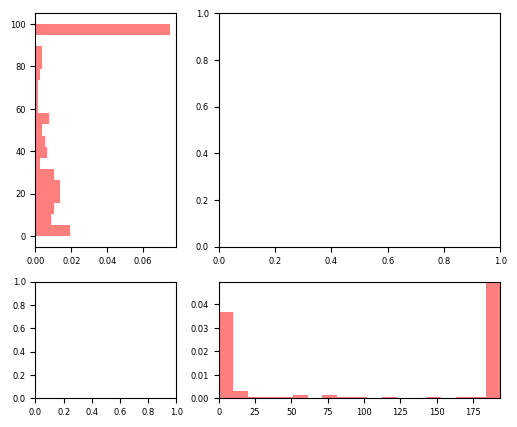

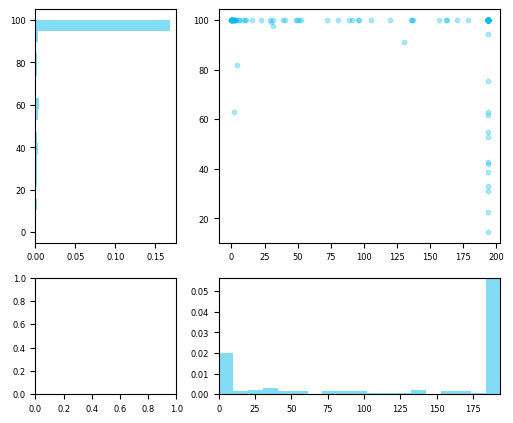

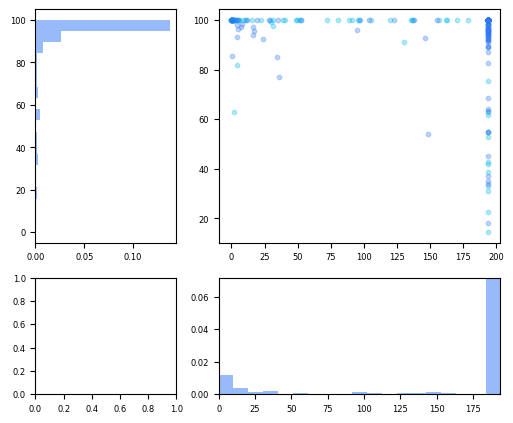

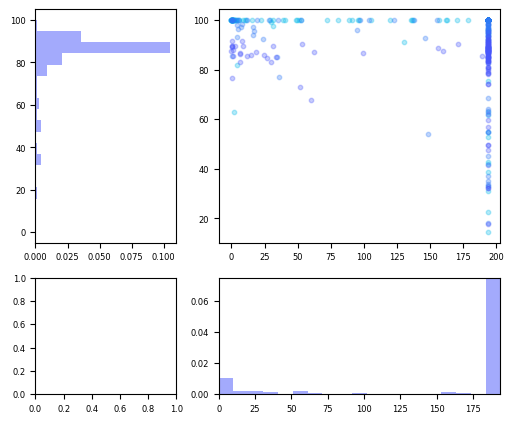

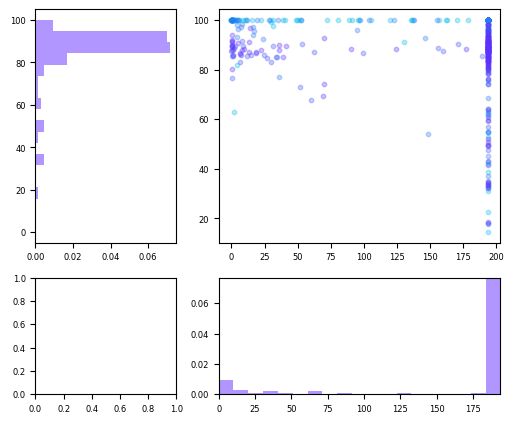

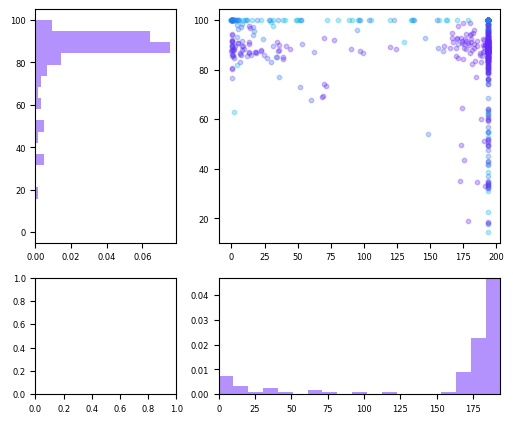

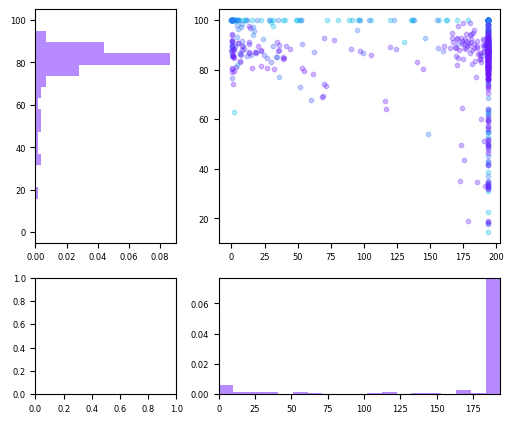

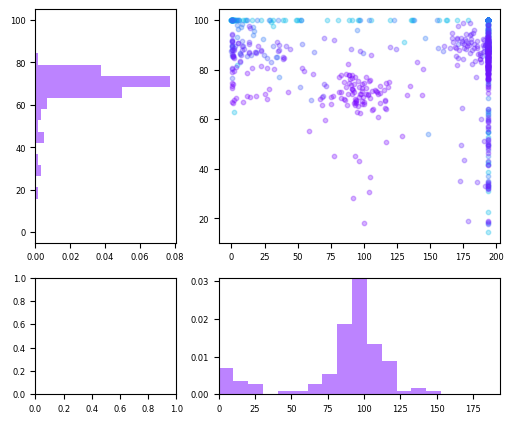

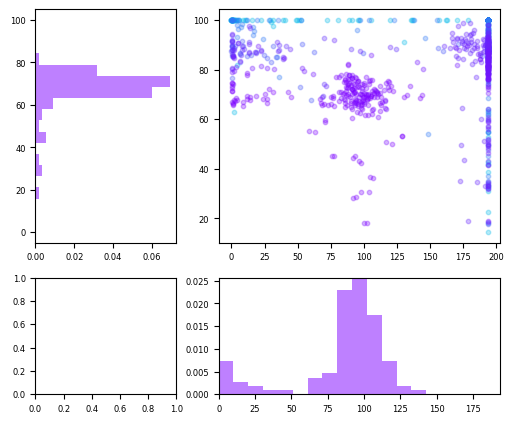

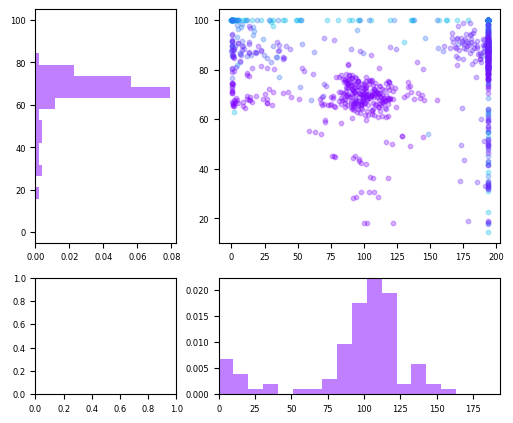

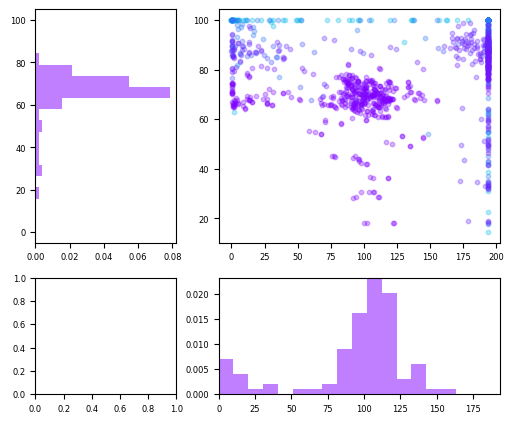

In [147]:
fidd = []
for fid in range(11):
    post_df = pyemu.ParameterEnsemble.from_csv(
        pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(fid)))


    fig, axes = plt.subplots(2,2,figsize=(6,5), gridspec_kw={'height_ratios': [2, 1], 'width_ratios': [1, 2]})
    axes[0,0].hist(post_df.loc[:, y_var].values,
            bins=np.linspace(
                sel_pars.loc[sel_pars["parnme"]==y_var, 'parlbnd'].values[0], 
                sel_pars.loc[sel_pars["parnme"]==y_var, 'parubnd'].values[0], 20),
            color=[rgba_vals[fid]], 
            alpha=0.5, density=True,
            label="Prior",
            orientation="horizontal"
    )
    fidd.append(fid)
    for fd in fidd:
        fd_df = pyemu.ParameterEnsemble.from_csv(
            pst=pst,filename=os.path.join(m_d,"animas_amrs_pp_rw_ies_init_zero.{0}.par.csv".format(fd)))
        if fd > 0:
            
            axes[0,1].scatter(
                    fd_df.loc[:, x_var], fd_df.loc[:, y_var], label='Observed',
                    color=[rgba_vals[fd]],s=10,
                    alpha=0.3,     
                    )
#     axes[0,1].set_xlim(0, 0.5)
#     axes[0,0].set_ylim(0, 100)
#     axes[0,1].set_ylim(0, 100)
#     axes[1,1].margins(x=0.1)
    axes[1,1].hist(post_df.loc[:, x_var].values,
            bins=np.linspace(
                sel_pars.loc[sel_pars["parnme"]==x_var, 'parlbnd'].values[0], 
                sel_pars.loc[sel_pars["parnme"]==x_var, 'parubnd'].values[0], 20),
            color=[rgba_vals[fid]], 
            alpha=0.5, density=True,
            label="Prior"
    )
    axes[1,1].margins(x=0, y=0)
    fig.show()

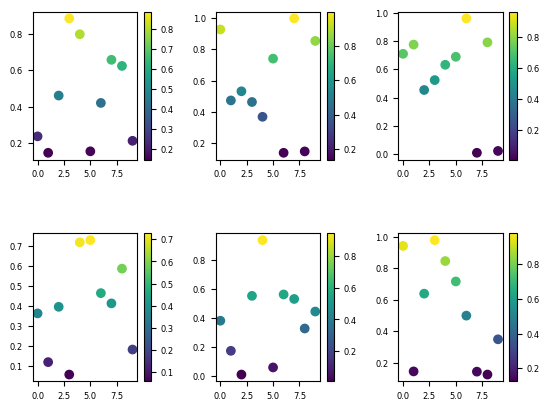

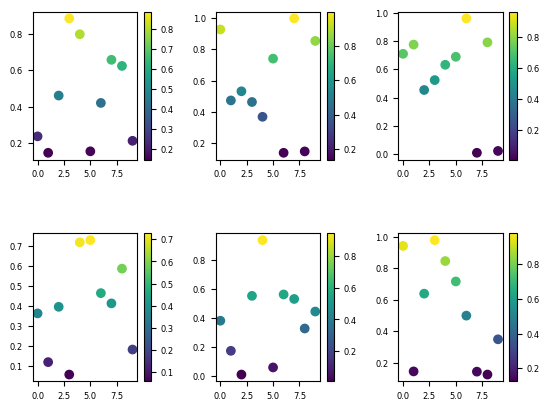

In [150]:

x1 = x2 = np.arange(10)
y1 = y2 = c = np.random.rand(10,6)

plt.figure(1)
plt.subplots_adjust(hspace=.5,wspace=0.4)

plt.figure(2)
plt.subplots_adjust(hspace=.5,wspace=0.4)

for i in range(6):
    plt.figure(1)
    plt.subplot(2,3,i+1)
    sc1 = plt.scatter(x1,y1[:,i], c=c[:,i])
    plt.colorbar(sc1)

    plt.figure(2)
    plt.subplot(2,3,i+1)
    sc2 = plt.scatter(x1,y1[:,i], c=c[:,i])
    plt.colorbar(sc2)

plt.savefig("plot.png") 
plt.show()   
plt.close()